![Coca Cola](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Coca-Cola_logo.svg/640px-Coca-Cola_logo.svg.png) ![Coca Cola](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/15-09-26-RalfR-WLC-0098_-_Coca-Cola_glass_bottle_%28Germany%29.jpg/135px-15-09-26-RalfR-WLC-0098_-_Coca-Cola_glass_bottle_%28Germany%29.jpg)
<h1 style="color:hotpink; font-style:italic; text-decoration:underline;">Stock Analysis of Coca Cola</h1>

## 1. *Import Libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
#ignore the warnings
import warnings 
warnings.filterwarnings('ignore')

## 2. *Loading the Datasets*

In [2]:
df1=pd.read_csv("Coca-Cola_stock_history.csv",parse_dates=True)
df2=pd.read_csv("Coca-Cola_stock_info.csv")

In [3]:
df1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


## 3. *Basic EDA*

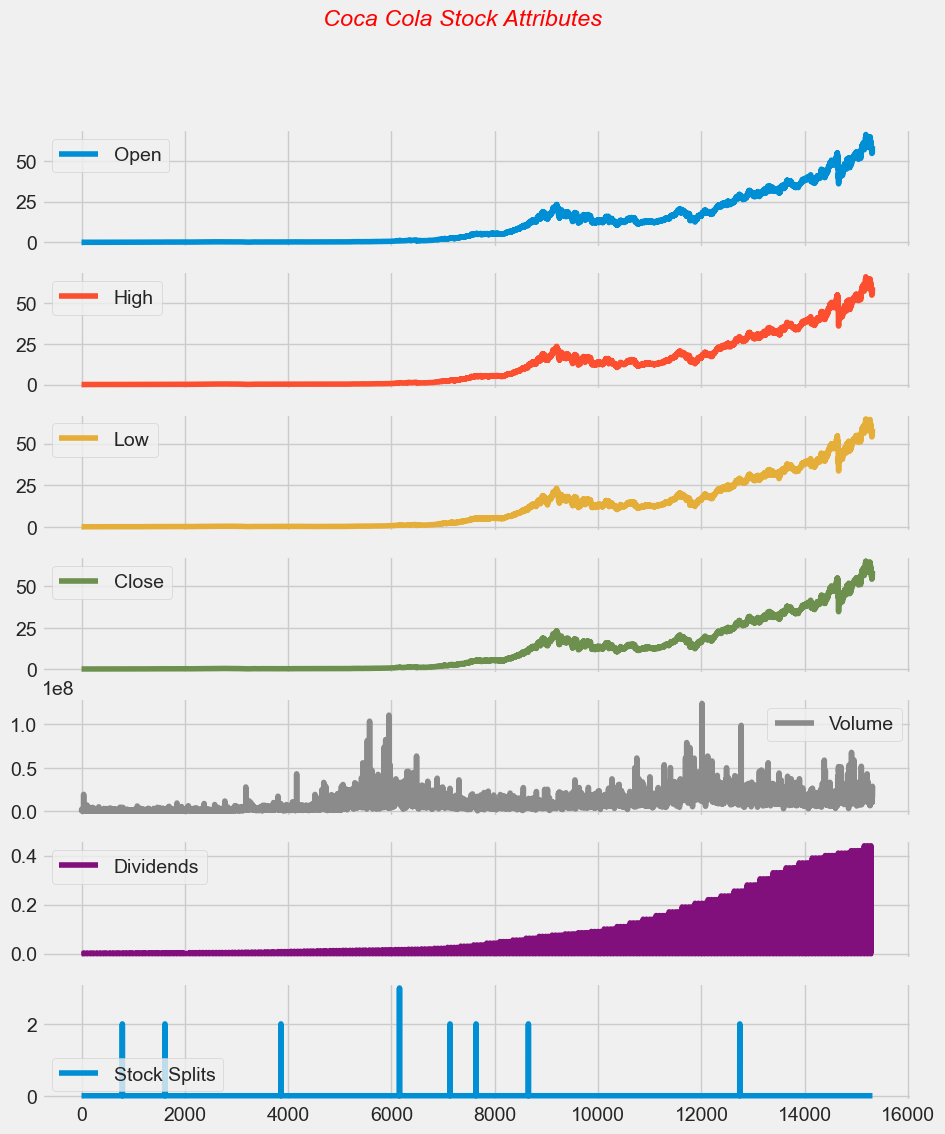

In [4]:
df1.plot(subplots = True, figsize = (10,12))
plt.suptitle('Coca Cola Stock Attributes',c='r',fontstyle='italic')
plt.show()

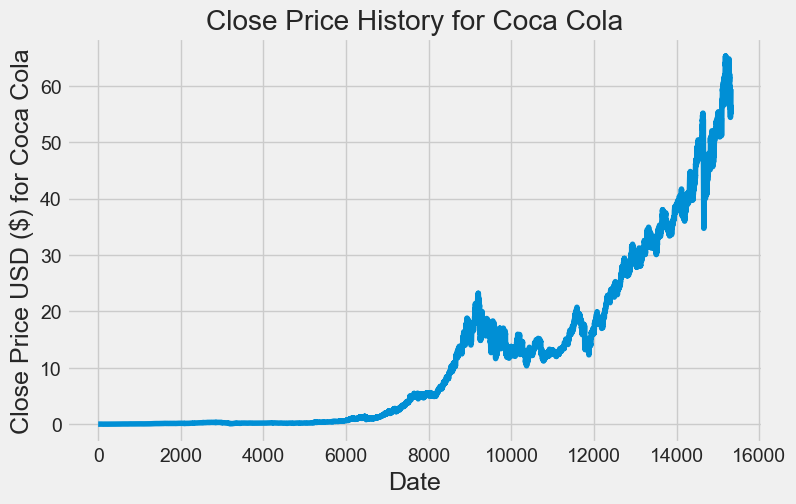

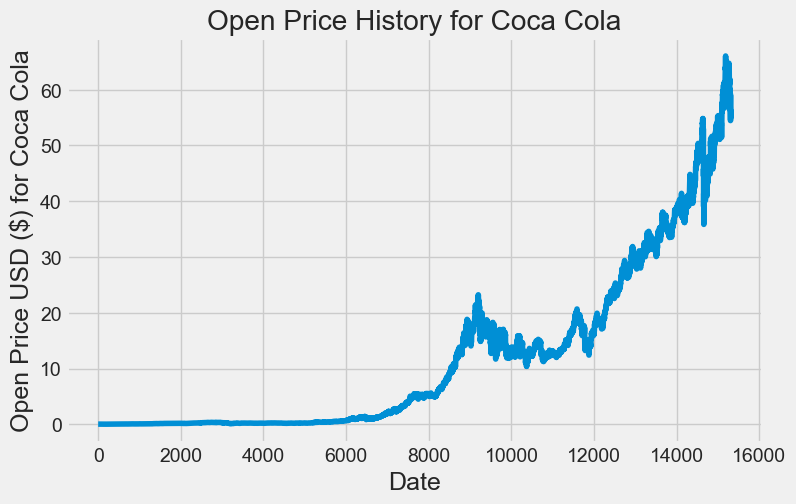

In [5]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(8,5))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

#Test the function
plot_close_val(df1, 'Close', 'Coca Cola')
plot_close_val(df1, 'Open',  'Coca Cola')

In [ ]:
df1[["Volume"]].plot()
plt.show()

## 4. *Basic Company Info*

In [ ]:
df2.head()

In [ ]:
df2.dropna(inplace=True)

In [ ]:
df2.isnull().sum()

In [ ]:
ko = df2.sort_values('Value').style
ko

## 5. *Basic CAGR*

In [ ]:
'''
from datetime import datetime, timezone

now = datetime.now(timezone.utc)

KO_Data = pd.read_csv('../input/coca-cola-stock-live-and-updated/Coca-Cola_stock_history.csv', 
                      header=0,
                      index_col= 0, 
                      names=['Date','Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Splits'], 
                      parse_dates=['Date'])
#['Date'])
# Get the number of days in `KO`
#
#KO_Data['Date'] = KO_Data['Date'].replace(tzinfo=None)
diff = KO_Data.index[-1](tzinfo=datetime.timezone.utc) - KO_Data.index[0](tzinfo=datetime.timezone.utc)
days = diff.days

# Calculate the CAGR 
cagr = ((((KO_Data['Close'][-1]) / KO_Data['Close'][1])) ** (365.0/days)) - 1


# Print CAGR
print("The CAGR (Compounded Annual Growth Rate) of Coca Cola since IPO is " , round((cagr*100),2), "% per year")
'''

### *Basic Rolling Averages*

In [ ]:
# Isolate the adjusted closing prices 
adj_close_px = df1['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

In [ ]:
# Short moving window rolling mean
df1['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
df1['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
df1[['Close', '42', '252']].plot()

plt.show()

In [ ]:
daily_close_px = df1[['Close']]
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(8,5))

# Show the resulting plot
plt.show()

In [ ]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(8, 5))

# Show the plot
plt.show()

In [ ]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(8,5))

# Show the plot
plt.show()

### *Basic MADC*

In [ ]:
import plotly.graph_objects as go
df1=df1.reset_index()
fig = go.Figure(data=go.Ohlc(x=df1['Date'],
        open=df1['Open'],
        high=df1['High'],
        low=df1['Low'],
        close=df1['Close']))
fig.update_layout(
    width=1000,
    height=500,
)
fig.show()

### *Basic SMA*

In [ ]:
df1=df1.reset_index()
df1['SMA5'] = df1.Close.rolling(5).mean()
df1['SMA20'] = df1.Close.rolling(20).mean()
df1['SMA50'] = df1.Close.rolling(50).mean()
df1['SMA200'] = df1.Close.rolling(200).mean()
df1['SMA500'] = df1.Close.rolling(500).mean()
fig =go.Figure(data=[go.Ohlc(x=df1['Date'],open=df1['Open'],
high=df1['High'],low=df1['Low'],close=df1['Close'],
name = "OHLC"),go.Scatter(x=df1.Date,y=df1.SMA5, line=dict(color='orange', width=1),name="SMA5"),go.Scatter(x=df1.Date,y=df1.SMA20, line=dict(color='green', width=1),
name="SMA20"),go.Scatter(x=df1.Date,y=df1.SMA50, line=dict(color='blue', width=1),name="SMA50"),go.Scatter(x=df1.Date,y=df1.SMA200, line=dict(color='violet', width=1),
name="SMA200"),go.Scatter(x=df1.Date,y=df1.SMA500, line=dict(color='purple', width=1),name="SMA500")])
fig.show()

### *Basic EMA*

In [ ]:
df1['EMA5'] = df1.Close.ewm(span=5,adjust=False).mean()
df1['EMA20'] = df1.Close.ewm(span=20,adjust=False).mean()
df1['EMA50'] = df1.Close.ewm(span=50,adjust=False).mean()
df1['EMA200'] = df1.Close.ewm(span=200,adjust=False).mean()
df1['EMA500'] = df1.Close.ewm(span=500,adjust=False).mean()
fig = go.Figure(data=[go.Ohlc(x=df1['Date'],open=df1['Open'],high=df1['High'],low=df1['Low'],close=df1['Close'], name = "OHLC"),go.Scatter(x=df1.Date,
y=df1.SMA5, line=dict(color='orange', width=1),
name="EMA5"),
go.Scatter(x=df1.Date,
y=df1.SMA20, line=dict(color='green', width=1),
name="EMA20"),
go.Scatter(x=df1.Date,
y=df1.SMA50, line=dict(color='blue', width=1),
name="EMA50"),
go.Scatter(x=df1.Date,
y=df1.SMA200,line=dict(color='violet',width=1),
name="EMA200"),
go.Scatter(x=df1.Date,
y=df1.SMA500,line=dict(color='purple',width=1),
name="EMA500")])
fig.show()

In [ ]:
df1.head()

## 6. *FINTA Tech Analysis Ratios*

## Let us do a financial ratios calculation using FINTA library
* Simple Moving Average 'SMA'
* Simple Moving Median 'SMM'
* Smoothed Simple Moving Average 'SSMA'
* Exponential Moving Average 'EMA'
* Double Exponential Moving Average 'DEMA'
* Triple Exponential Moving Average 'TEMA'
* Triangular Moving Average 'TRIMA'
* Triple Exponential Moving Average Oscillator 'TRIX'
* Volume Adjusted Moving Average 'VAMA'
* Kaufman Efficiency Indicator 'ER'
* Kaufman's Adaptive Moving Average 'KAMA'
* Zero Lag Exponential Moving Average 'ZLEMA'
* Weighted Moving Average 'WMA'
* Hull Moving Average 'HMA'
* Elastic Volume Moving Average 'EVWMA'
* Volume Weighted Average Price 'VWAP'
* Smoothed Moving Average 'SMMA'
* Fractal Adaptive Moving Average 'FRAMA'
* Moving Average Convergence Divergence 'MACD'
* Percentage Price Oscillator 'PPO'
* Volume-Weighted MACD 'VW_MACD'
* Elastic-Volume weighted MACD 'EV_MACD'
* Market Momentum 'MOM'
* Rate-of-Change 'ROC'
* Relative Strenght Index 'RSI'
* Inverse Fisher Transform RSI 'IFT_RSI'
* True Range 'TR'
* Average True Range 'ATR'
* Stop-and-Reverse 'SAR'
* Bollinger Bands 'BBANDS'
* Bollinger Bands Width 'BBWIDTH'
* Momentum Breakout Bands 'MOBO'
* Percent B 'PERCENT_B'
* Keltner Channels 'KC'
* Donchian Channel 'DO'
* Directional Movement Indicator 'DMI'
* Average Directional Index 'ADX'
* Pivot Points 'PIVOT'
* Fibonacci Pivot Points 'PIVOT_FIB'
* Stochastic Oscillator %K 'STOCH'
* Stochastic oscillator %D 'STOCHD'
* Stochastic RSI 'STOCHRSI'
* Williams %R 'WILLIAMS'
* Ultimate Oscillator 'UO'
* Awesome Oscillator 'AO'
* Mass Index 'MI'
* Vortex Indicator 'VORTEX'
* Know Sure Thing 'KST'
* True Strength Index 'TSI'
* Typical Price 'TP'
* Accumulation-Distribution Line 'ADL'
* Chaikin Oscillator 'CHAIKIN'
* Money Flow Index 'MFI'
* On Balance Volume 'OBV'
* Weighter OBV 'WOBV'
* Volume Zone Oscillator 'VZO'
* Price Zone Oscillator 'PZO'
* Elder's Force Index 'EFI'
* Cummulative Force Index 'CFI'
* Bull power and Bear Power 'EBBP'
* Ease of Movement 'EMV'
* Commodity Channel Index 'CCI'
* Coppock Curve 'COPP'
* Buy and Sell Pressure 'BASP'
* Normalized BASP 'BASPN'
* Chande Momentum Oscillator 'CMO'
* Chandelier Exit 'CHANDELIER'
* Qstick 'QSTICK'
* Twiggs Money Index 'TMF'
* Wave Trend Oscillator 'WTO'
* Fisher Transform 'FISH'
* Ichimoku Cloud 'ICHIMOKU'
* Adaptive Price Zone 'APZ'
* Squeeze Momentum Indicator 'SQZMI'
* Volume Price Trend 'VPT'
* Finite Volume Element 'FVE'
* Volume Flow Indicator 'VFI'
* Moving Standard deviation 'MSD'
* Schaff Trend Cycle 'STC'

In [ ]:
try:
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover
except:
    #!pip install finta backtesting
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover

In [ ]:
fin_ma = pd.read_csv('Coca-Cola_stock_history.csv',  parse_dates=True)
print(fin_ma.head())
ohlc=fin_ma
print(TA.SMA(ohlc, 42))

In [ ]:
function_dict = {' Simple Moving Average ' : 'SMA',
                 ' Simple Moving Median ' : 'SMM',
                 ' Smoothed Simple Moving Average ' : 'SSMA',
                 ' Exponential Moving Average ' : 'EMA',
                 ' Double Exponential Moving Average ' : 'DEMA',
                 ' Triple Exponential Moving Average ' : 'TEMA',
                 ' Triangular Moving Average ' : 'TRIMA',
                 ' Triple Exponential Moving Average Oscillator ' : 'TRIX',
                 ' Volume Adjusted Moving Average ' : 'VAMA',
                 ' Kaufman Efficiency Indicator ' : 'ER',
                 ' Kaufmans Adaptive Moving Average ' : 'KAMA',
                 ' Zero Lag Exponential Moving Average ' : 'ZLEMA',
                 ' Weighted Moving Average ' : 'WMA',
                 ' Hull Moving Average ' : 'HMA',
                 ' Elastic Volume Moving Average ' : 'EVWMA',
                 ' Volume Weighted Average Price ' : 'VWAP',
                 ' Smoothed Moving Average ' : 'SMMA',
                 ' Fractal Adaptive Moving Average ' : 'FRAMA',
                 ' Moving Average Convergence Divergence ' : 'MACD',
                 ' Percentage Price Oscillator ' : 'PPO',
                 ' Volume-Weighted MACD ' : 'VW_MACD',
                 ' Elastic-Volume weighted MACD ' : 'EV_MACD',
                 ' Market Momentum ' : 'MOM',
                 ' Rate-of-Change ' : 'ROC',
                 ' Relative Strength Index ' : 'RSI',
                 ' Inverse Fisher Transform RSI ' : 'IFT_RSI',
                 ' True Range ' : 'TR',
                 ' Average True Range ' : 'ATR',
                 ' Stop-and-Reverse ' : 'SAR',
                 ' Bollinger Bands ' : 'BBANDS',
                 ' Bollinger Bands Width ' : 'BBWIDTH',
                 ' Momentum Breakout Bands ' : 'MOBO',
                 ' Percent B ' : 'PERCENT_B',
                 ' Keltner Channels ' : 'KC',
                 ' Donchian Channel ' : 'DO',
                 ' Directional Movement Indicator ' : 'DMI',
                 ' Average Directional Index ' : 'ADX',
                 ' Pivot Points ' : 'PIVOT',
                 ' Fibonacci Pivot Points ' : 'PIVOT_FIB',
                 ' Stochastic Oscillator Percent K ' : 'STOCH',
                 ' Stochastic oscillator Percent D ' : 'STOCHD',
                 ' Stochastic RSI ' : 'STOCHRSI',
                 ' Williams Percent R ' : 'WILLIAMS',
                 ' Ultimate Oscillator ' : 'UO',
                 ' Awesome Oscillator ' : 'AO',
                 ' Mass Index ' : 'MI',
                 #' Vortex Indicator ' : 'VORTEX',
                 ' Know Sure Thing ' : 'KST',
                 ' True Strength Index ' : 'TSI',
                 ' Typical Price ' : 'TP',
                 ' Accumulation-Distribution Line ' : 'ADL',
                 ' Chaikin Oscillator ' : 'CHAIKIN',
                 ' Money Flow Index ' : 'MFI',
                 ' On Balance Volume ' : 'OBV',
                 ' Weighter OBV ' : 'WOBV',
                 ' Volume Zone Oscillator ' : 'VZO',
                 ' Price Zone Oscillator ' : 'PZO',
                 ' Elders Force Index ' : 'EFI',
                 ' Cummulative Force Index ' : 'CFI',
                 ' Bull power and Bear Power ' : 'EBBP',
                 ' Ease of Movement ' : 'EMV',
                 ' Commodity Channel Index ' : 'CCI',
                 ' Coppock Curve ' : 'COPP',
                 ' Buy and Sell Pressure ' : 'BASP',
                 ' Normalized BASP ' : 'BASPN',
                 ' Chande Momentum Oscillator ' : 'CMO',
                 ' Chandelier Exit ' : 'CHANDELIER',
                 ' Qstick ' : 'QSTICK',
                 #' Twiggs Money Index ' : 'TMF',
                 ' Wave Trend Oscillator ' : 'WTO',
                 ' Fisher Transform ' : 'FISH',
                 ' Ichimoku Cloud ' : 'ICHIMOKU',
                 ' Adaptive Price Zone ' : 'APZ',
                 #' Squeeze Momentum Indicator ' : 'SQZMI',
                 ' Volume Price Trend ' : 'VPT',
                 ' Finite Volume Element ' : 'FVE',
                 ' Volume Flow Indicator ' : 'VFI',
                 ' Moving Standard deviation ' : 'MSD',
                 ' Schaff Trend Cycle ' : 'STC'}

for key, value in function_dict.items():
    try:
        function_name = "TA." + value + "(ohlc).plot(title='" + key + " for Coca Cola / Coke Stock')"
        result = eval(function_name)
    except AttributeError as e:
        print(f"An error occurred for {key}: {e}")

## 7. *Back Testing Trading Strategy*

In [ ]:
# Defining DEMA cross strategy
class DemaCross(Strategy):

    def init(self):

        self.ma1 = self.I(TA.DEMA, ohlc, 10)
        self.ma2 = self.I(TA.DEMA, ohlc, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

### *Let us do a bit of backtesting with a value of $100000*

In [ ]:
ohlc.head()
print(ohlc.Date)

In [ ]:
bt = Backtest(ohlc, DemaCross,
              cash=100000, commission=0.015, exclusive_orders=True)

### *Back Testing Summary*

In [ ]:
bt.run()

In [ ]:
data=ohlc

### 7.1 *BackTesting Trading Strategy Heatmaps*

In [ ]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

In [ ]:
def BBANDS(data, n_lookback, n_std):
    """Bollinger bands indicator"""
    hlc3 = (data.High + data.Low + data.Close) / 3
    mean, std = hlc3.rolling(n_lookback).mean(), hlc3.rolling(n_lookback).std()
    upper = mean + n_std*std
    lower = mean - n_std*std
    return upper, lower


close = data.Close.values
sma10 = SMA(data.Close, 10)
sma20 = SMA(data.Close, 20)
sma50 = SMA(data.Close, 50)
sma100 = SMA(data.Close, 100)
upper, lower = BBANDS(data, 20, 2)

# Design matrix / independent features:

# Price-derived features
data['X_SMA10'] = (close - sma10) / close
data['X_SMA20'] = (close - sma20) / close
data['X_SMA50'] = (close - sma50) / close
data['X_SMA100'] = (close - sma100) / close

data['X_DELTA_SMA10'] = (sma10 - sma20) / close
data['X_DELTA_SMA20'] = (sma20 - sma50) / close
data['X_DELTA_SMA50'] = (sma50 - sma100) / close

# Indicator features
data['X_MOM'] = data.Close.pct_change(periods=2)
data['X_BB_upper'] = (upper - close) / close
data['X_BB_lower'] = (lower - close) / close
data['X_BB_width'] = (upper - lower) / close
#data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14')

# Some datetime features for good measure
#data['X_day'] = data.index.dayofweek
#data['X_hour'] = data.index.hour

#data = data.apply(pd.to_numeric)
#data = data.dropna().astype(np.float64)
#data.fillna(method="ffill")
#data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

#data.replace([np.inf, -np.inf], 0.0, inplace=True)
#data = data.fillna(data.mean(), inplace=True)
#data = data.dropna().astype(np.float64)


In [ ]:
class Sma4Cross(Strategy):
    n1 = 50
    n2 = 100
    n_enter = 20
    n_exit = 10
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sma_enter = self.I(SMA, self.data.Close, self.n_enter)
        self.sma_exit = self.I(SMA, self.data.Close, self.n_exit)
        
    def next(self):
        
        if not self.position:
            
            # On upwards trend, if price closes above
            # "entry" MA, go long
            
            # Here, even though the operands are arrays, this
            # works by implicitly comparing the two last values
            if self.sma1 > self.sma2:
                if crossover(self.data.Close, self.sma_enter):
                    self.buy()
                    
            # On downwards trend, if price closes below
            # "entry" MA, go short
            
            else:
                if crossover(self.sma_enter, self.data.Close):
                    self.sell()
        
        # But if we already hold a position and the price
        # closes back below (above) "exit" MA, close the position
        
        else:
            if (self.position.is_long and
                crossover(self.sma_exit, self.data.Close)
                or
                self.position.is_short and
                crossover(self.data.Close, self.sma_exit)):
                
                self.position.close()

In [ ]:
%%time 

from backtesting import Backtest
from backtesting.test import GOOG


backtest = Backtest(ohlc, Sma4Cross, commission=.002)

stats, heatmap = backtest.optimize(
    n1=range(10, 110, 10),
    n2=range(20, 210, 20),
    n_enter=range(15, 35, 5),
    n_exit=range(10, 25, 5),
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    max_tries=200,
    random_state=0,
    return_heatmap=True)

In [ ]:
heatmap

In [ ]:
hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm

In [ ]:
from backtesting.lib import plot_heatmaps


plot_heatmaps(heatmap, agg='mean')

In [ ]:
%%time

stats_skopt, heatmap, optimize_result = backtest.optimize(
    n1=[10, 100],      # Note: For method="skopt", we
    n2=[20, 200],      # only need interval end-points
    n_enter=[10, 40],
    n_exit=[10, 30],
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    method='skopt',
    max_tries=200,
    random_state=0,
    return_heatmap=True,
    return_optimization=True)

In [ ]:
from skopt.plots import plot_objective

_ = plot_objective(optimize_result, n_points=10)